<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas 1: *Clustering***

###**Tenggat Waktu: 8 Oktober 2022, 23.55 WIB**
</center>

### **Ketentuan:**
1. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dapat dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama Lengkap.ipynb**. Contoh: B_Tugas1_1906398881_Thariq Razan.ipynb.
2. Pengumpulan tugas dilakukan melalui slot submisi yang telah disediakan di SCeLe. Keterlambatan pengumpulan akan dikenakan penalti sesuai dengan ketentuan pada BRP.
3. Tugas ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
4. Soal yang akan dinilai telah diberikan penanda bobot maksimal agar Anda mengetahui berapa poin yang bisa didapatkan. 

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan penalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Sophie Andira Cindani Gardian"
KELAS = "C"
NPM = "2006597443"

# Isi dengan NPM teman yang berdiskusi dengan Anda  
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan tugas ini
REFERENSI = []

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Sophie Andira Cindani Gardian dari kelas C dengan NPM 2006597443, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Sophie Andira Cindani Gardian)


## **Persiapan** [10 poin]
Pada tugas ini Anda akan diinstruksikan untuk melakukan *clustering* terhadap dataset yang telah disediakan di SCeLe. Sebelumnya, lakukan EDA untuk lebih memahami dataset tersebut. Lakukan pula *preprocessing* yang diperlukan. 

Dataset ini mengandung data yang diambil dari observasi ilmuwan terhadap penguin di Antarktika. Terdapat atribut seperti pulau habitat, tebal paruh, dan sebagainya. Pada tugas ini, bantulah ilmuwan untuk mengelompokkan penguin ke klaster tertentu!

In [106]:
# Impor library atau modul yang dibutuhkan pada tugas ini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

#tambahan modul
from scipy.cluster.hierarchy import dendrogram

1. Bukalah dataset dan tampilkan cuplikan dari dataset tersebut [1]

In [4]:
penguin = pd.read_csv('penguin.csv')
penguin

,pulau_habitat,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh,jenis_kelamin
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...
339,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


2. Tampilkan informasi dari dataset tersebut yang paling tidak mencakup jenis kolom dan jumlah *non-null cell* [1]

In [5]:
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pulau_habitat       344 non-null    object 
 1   panjang_paruh_atas  342 non-null    float64
 2   tebal_paruh_atas    342 non-null    float64
 3   panjang_sirip       342 non-null    float64
 4   massa_tubuh         342 non-null    float64
 5   jenis_kelamin       334 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


3. Tampilkan statistika deskriptif dari dataset tersebut [1]

In [6]:
penguin.describe()

,panjang_paruh_atas,tebal_paruh_atas,panjang_sirip,massa_tubuh
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. Lakukan penanganan terhadap *missing values* [2]

In [7]:
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

cek_null(penguin)

                    Total   Percent
jenis_kelamin          10  0.029070
panjang_paruh_atas      2  0.005814
tebal_paruh_atas        2  0.005814
panjang_sirip           2  0.005814
massa_tubuh             2  0.005814


Karena persentase missing values tidak besar, maka saya akan menghapus baris yang terdapat missing values di dalamnya

In [8]:
penguin_cleaned = penguin.copy()
penguin_cleaned.dropna(inplace=True)

In [9]:
cek_null(penguin_cleaned)

Empty DataFrame
Columns: [Total, Percent]
Index: []


5. Buatlah visualisasi untuk memahami distribusi data dari sebuah atribut dan memahami hubungan antar dua buah atribut [3]

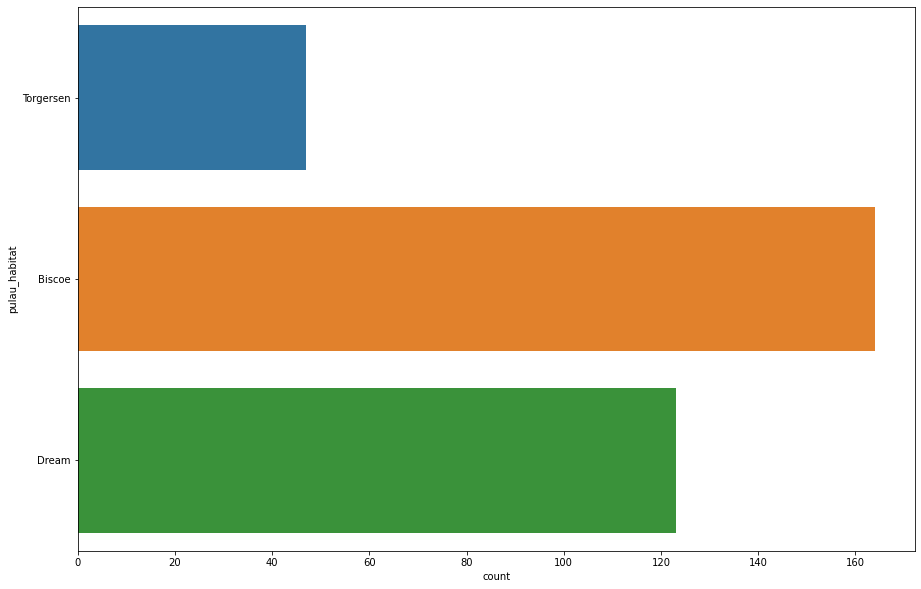

In [10]:
plt.figure(figsize=(15,10))
plt.yticks(size=10)

#to increase x ticks 
plt.xticks(size=10)
# Fungsi yang membuat plot untuk melihat distribusi frekuensi untuk satu kolom/atribut
sns.countplot(y='pulau_habitat', data=penguin_cleaned)

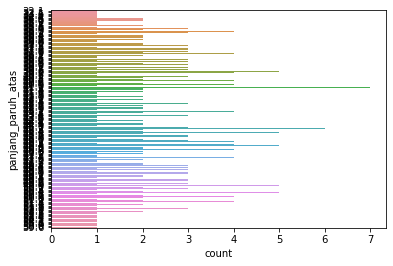

In [11]:
sns.countplot(y='panjang_paruh_atas', data=penguin_cleaned)

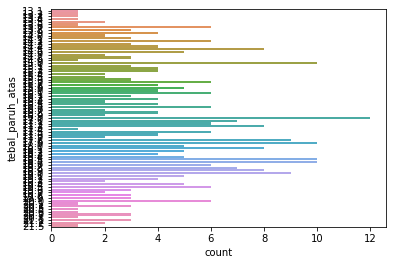

In [12]:
sns.countplot(y='tebal_paruh_atas', data=penguin_cleaned)

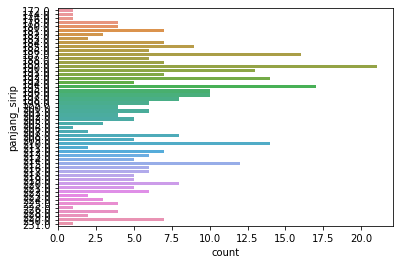

In [13]:
sns.countplot(y='panjang_sirip', data=penguin_cleaned)

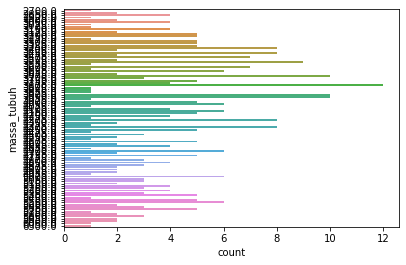

In [14]:
sns.countplot(y='massa_tubuh', data=penguin_cleaned)

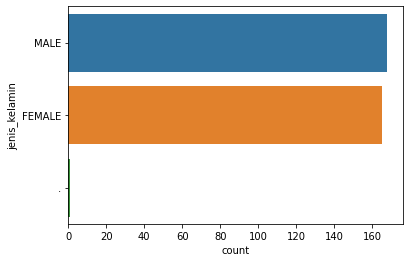

In [15]:
sns.countplot(y='jenis_kelamin', data=penguin_cleaned)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


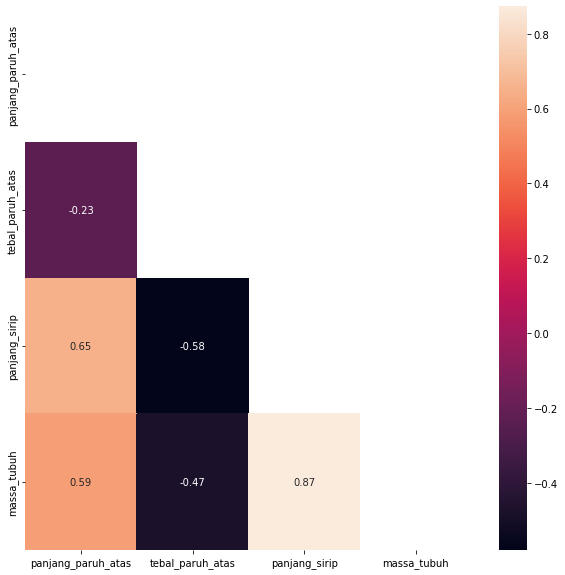

In [16]:
mask = np.triu(np.ones_like(penguin_cleaned.corr(), dtype=np.bool)) #agar tidak ada redundansi
plt.figure(figsize=(10,10))
sns.heatmap(penguin_cleaned.corr(method='pearson'), annot=True, mask = mask)

6. Pilihlah paling tidak 2 atribut yang Anda ingin gunakan untuk penentuan klaster. Jelaskan alasan Anda memilih kombinasi atribut tersebut [2]

> **Catatan**: Anda diharapkan untuk **bereksperimen** dengan pilihan atribut tersebut. Anda dapat lanjut ke bagian *clustering*, lalu kembali lagi ke bagian pemilihan atribut jika ingin mencoba kombinasi atribut yang berbeda. Pastikan jawaban akhir Anda dapat menghasilkan klaster yang **bermakna** (menghasilkan *insight* tertentu).

## **K-Means Clustering** [30 poin]
K-Means merupakan salah satu metode *clustering* yang paling populer. 'K' pada kata K-Means mengacu pada banyaknya kelompok yang ingin dibentuk. Menentukan nilai 'K' bersifat krusial karena memengaruhi kualitas *clustering*. Secara umum, kita dapat menerapkan K-Means secara manual dengan mengikuti langkah-langkah berikut: 
1. Menentukan nilai K dan memilih K buah centroid (titik pusat) secara acak
2. Mengelompokkan titik-titik data yang ada ke centroid terdekat
3. Menentukan ulang centroid dengan mengkalkulasi rata-rata data dari kelompok yang terbentuk
4. Mengulangi langkah 1-3 sampai memenuhi *stopping criteria*


7. Manfaatkan metrik *silhouette coefficient* untuk menentukan nilai K yang optimal (hint: lakukan *silhoutte analysis* terhadap nilai 2<=K<=6) [12]

8. Terapkan metode K-Means kepada dataframe yang sudah Anda siapkan, gunakan nilai K yang Anda tentukan di atas [8]

In [86]:
kmeans = KMeans(n_clusters=3)

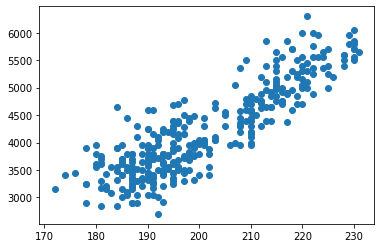

In [87]:
plt.scatter(x=penguin_cleaned['panjang_sirip'], y=penguin_cleaned['massa_tubuh'])

<PandasArray>
[0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
 ...
 2, 1, 2, 1, 2, 1, 1, 2, 2, 2]
Length: 334, dtype: int32


Text(0, 0.5, 'Panjang Sirip')

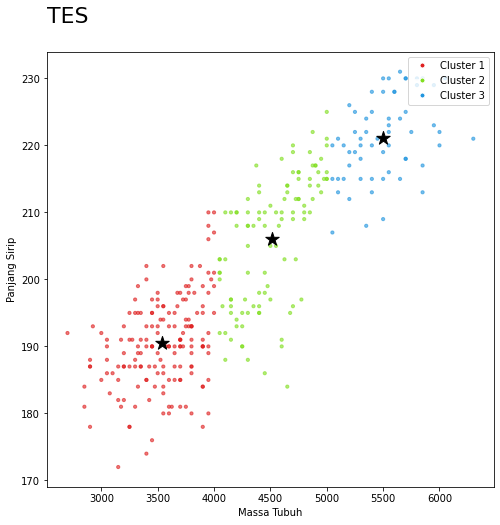

In [105]:
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
penguin_cleaned['cluster'] = kmeans.fit_predict(penguin_cleaned[['massa_tubuh', 'panjang_sirip']])
print(pd.array(penguin_cleaned['cluster']))

# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

## add to df
penguin_cleaned['cen_x'] = penguin_cleaned.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
penguin_cleaned['cen_y'] = penguin_cleaned.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
penguin_cleaned['c'] = penguin_cleaned.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

#####PLOT#####
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(8,8))

# plot data
plt.scatter(penguin_cleaned.massa_tubuh, penguin_cleaned.panjang_sirip, c=penguin_cleaned.c, alpha = 0.6, s=10)

#centroids
plt.scatter(centroids[0][0], centroids[0][1], marker="*", s=200, color='black')
plt.scatter(centroids[1][0], centroids[1][1], marker="*", s=200, color='black')
plt.scatter(centroids[2][0], centroids[2][1], marker="*", s=200, color='black')

# create a list of legend elemntes
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')
# title and labels
plt.title('TES\n', loc='left', fontsize=22)
plt.xlabel('Massa Tubuh')
plt.ylabel('Panjang Sirip')

9. Visualisasikan klaster yang ada [5]

10. Berikan interpretasi dari klaster yang dihasilkan [5]

## **Hierarchical Clustering** [30 poin]
*Hierarchical clustering* adalah metode pengelompokkan data yang bertujuan untuk membuat klaster bertingkat. Metode ini termasuk ke dalam *unsupervised* ML layaknya metode K-Means. Namun, beda dengan metode K-Means, tidak diperlukan penentuan jumlah klaster diawal menjalankan metode ini. 

Secara umum, terdapat dua pendekatan dalam membentuk hierarki klaster, yakni *bottom-up* (agglomerative) dan *top-down* (divisive).


11. Terapkan *agglomerative clustering* tanpa mengatur jumlah klaster yang ingin dibentuk [8]


In [108]:
hc = AgglomerativeClustering(affinity = "euclidian", linkage = "ward")

In [110]:
penguin_cleaned['cluster2'] = kmeans.fit_predict(penguin_cleaned[['massa_tubuh', 'panjang_sirip']])


12. Tampilkan dendogram berdasarkan hasil *clustering* di atas. Dari hasil tersebut, apakah jumlah klaster optimal sama seperti hasil K-Means sebelumnya? Jelaskan hasilnya! (hint: tentukan ambang batas aglomerasi pada dendogram) [13]

In [112]:
# dendrogram = shc.dendrogram(shc.linkage(penguin_cleaned['cluster2'], method = 'ward'))

ValueError: ignored

13. Terapkan kembali *agglomerative clustering*, namun aturlah jumlah klaster sesuai jawaban kalian di atas [5]

14. Visualisasikan hasil *clustering assignment* [4]

## **Pertanyaan Teoretis** [30 poin]

**Pada bagian tugas ini, Anda diminta untuk menjawab pertanyaan yang telah diberikan di bawah ini.**

15. Jika suatu dataset mengandung campuran *categorical* dan *numerical* *feature*, penanganan apa yang bisa Anda lakukan terhadap *categorical feature* sebelum melakukan *clustering*? [8]
16. Mengapa K-Means *clustering* kurang cocok jika diterapkan pada dataset yang struktur/bentuk penyebarannya tidak globular? [8]
17. Apakah method KMeans dari sklearn akan memberikan hasil yang sama tiap kali dijalankan? Berikan penjelasan atau asumsi Anda terkait hal ini! [6]
18. Jelaskan cara menghitung *intra-cluster similarity* dan *inter-cluster dissimilarity*! Secara umum, apakah yang membuat suatu klaster dianggap baik berdasarkan kedua metrik di atas? [8]